In [27]:
!pip install -q transformers datasets

In [34]:
import glob
boards_paths = glob.glob("/content/drive/MyDrive/project-level content/*.png")

<Figure size 1440x720 with 0 Axes>

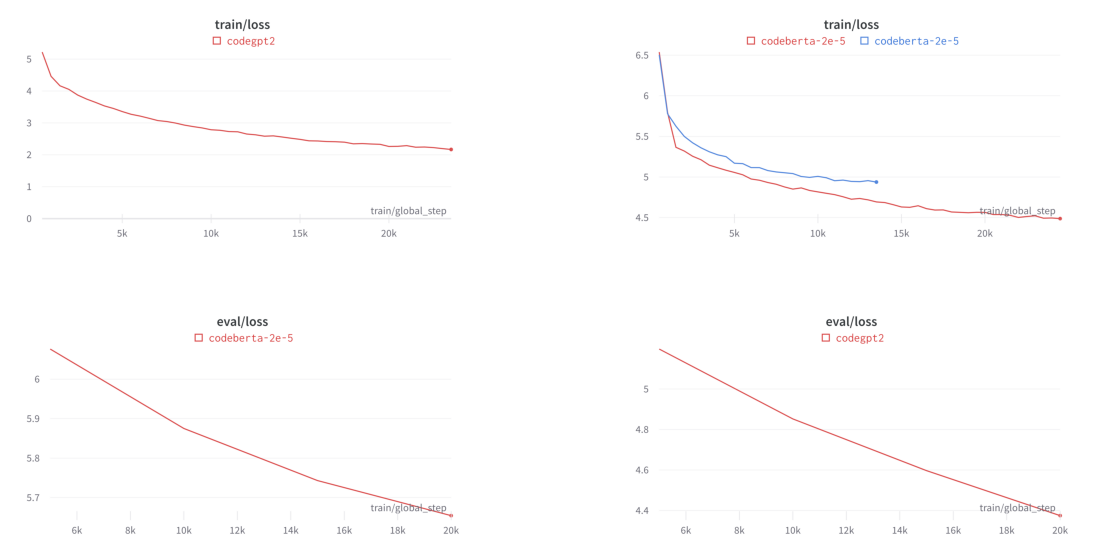

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(20, 10))

for i in range(len(boards_paths)):
    ax[i // 2, i % 2].imshow(mpimg.imread(boards_paths[i]))
    ax[i // 2, i % 2].axis('off')
plt.show()

In [28]:
from transformers import RobertaTokenizerFast

tokenizer = RobertaTokenizerFast.from_pretrained('/content/drive/MyDrive/project-level content/tokenizer/', max_len=512)

In [29]:
import torch
from transformers import pipeline

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
fill_mask = pipeline(
    "fill-mask",
    model="/content/drive/MyDrive/project-level content/codeberta2ep/",
    tokenizer='/content/drive/MyDrive/project-level content/codeberta2ep/'
)

In [30]:
fill_mask("""package org.wikipedia;
import static java.lang.System.out;

public class HelloWorld {
    public static <mask> main(String[] arguments) {
        out.println("Hallo Welt.");
    }
}""")[0]['token_str']

' void'

Fails to capture custom names

In [33]:
fill_mask("""class FreshJuice {
   enum FreshJuiceSize{ SMALL, MEDIUM, LARGE }
   FreshJuiceSize size;
}

public class FreshJuiceTest {

   public static void main(String args[]) {
      FreshJuice juice = new <mask>();
      juice.size = FreshJuice.FreshJuiceSize.MEDIUM ;
      System.out.println("Size: " + juice.size);
   }
}""")

[{'score': 0.04614078998565674,
  'token': 388,
  'token_str': '     ',
  'sequence': 'class FreshJuice {\n   enum FreshJuiceSize{ SMALL, MEDIUM, LARGE }\n   FreshJuiceSize size;\n}\n\npublic class FreshJuiceTest {\n\n   public static void main(String args[]) {\n      FreshJuice juice = new     ();\n      juice.size = FreshJuice.FreshJuiceSize.MEDIUM ;\n      System.out.println("Size: " + juice.size);\n   }\n}'},
 {'score': 0.04424732178449631,
  'token': 203,
  'token_str': '\n',
  'sequence': 'class FreshJuice {\n   enum FreshJuiceSize{ SMALL, MEDIUM, LARGE }\n   FreshJuiceSize size;\n}\n\npublic class FreshJuiceTest {\n\n   public static void main(String args[]) {\n      FreshJuice juice = new\n();\n      juice.size = FreshJuice.FreshJuiceSize.MEDIUM ;\n      System.out.println("Size: " + juice.size);\n   }\n}'},
 {'score': 0.03680283948779106,
  'token': 18,
  'token_str': '.',
  'sequence': 'class FreshJuice {\n   enum FreshJuiceSize{ SMALL, MEDIUM, LARGE }\n   FreshJuiceSize size